In [357]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import re
import csv
from textblob import TextBlob
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
df = pd.read_csv('tweets.csv',encoding= "ISO-8859–1")
df

,tweet_id,tweet_ts,tweet_text,location,rt_count,fav_count,tweet_retweet,hashtags
0,1357386903159361538,2021-02-04 17:53:51,Muder of ð,NaN,172,0,RT,#TooMuchDemocracy
1,1357386894493896705,2021-02-04 17:53:49,Star War breaks out in India.All thanks to sup...,"Scarborough, England",48,0,RT,"#ModiGlobalDisaster, #TooMuchDemocracy"
2,1357386887648935942,2021-02-04 17:53:47,Whaat? We haven't disabled Rihanna's twitter h...,NaN,914,0,RT,#TooMuchDemocracy
3,1357386875560808448,2021-02-04 17:53:44,RJD MP Prof Manoj Jha lambasted Modi in the ru...,"Ahmadabad City, India",563,0,RT,"#FarmersProstest, #Toâ¦"
4,1357386864597041153,2021-02-04 17:53:42,"Too much shame brought to India by RW ,BJP, bh...",NaN,3,0,RT,#TooMuchDemocracy
...,...,...,...,...,...,...,...,...
17611,1355038916869406722,2021-01-29 06:23:47,Interesting speed at which the so called secul...,NaN,271,0,TWEET,NaN
17612,1355024298944065536,2021-01-29 05:25:42,Finish EGO ðð»Not FARMERS ð¾,NaN,1,6,TWEET,NaN
17613,1355017431735930881,2021-01-29 04:58:25,Art has and will always be for everyone. It ha...,India,107,0,TWEET,NaN
17614,1355017298789208064,2021-01-29 04:57:53,Watch. The Power of Words#TooMuchDemocracyby....,NaN,0,5,TWEET,#TooMuchDemocracyby.


In [358]:
df.columns

Index(['tweet_id', 'tweet_ts', 'tweet_text', 'location', 'rt_count',
       'fav_count', 'tweet_retweet', 'hashtags'],
      dtype='object')

In [359]:
df.hashtags.value_counts().head(10)

#TooMuchDemocracy                                                               2915
#FarmersProstest#Toâ¦                                                          1345
#FarmersProstest, #Toâ¦                                                         516
#TooMuchDemocracy, #SpinelessCelebs                                              314
#TooMuchDemocracy, #ToolKitExposed, #FarmersProtest                              209
#StandWithFarmers#TooMuchDemocracy#FarmersAreIndiað                           199
#FarmersAreIndiahâ¦                                                             188
#FarmersAreIndia#TooMuchDemocracy                                                171
#ModiGlobalDisaster                                                              154
#IStandWithFarmers, #IStandWithFarmers, #TooMuchDemocracy, #TooMuchDemocracy     124
Name: hashtags, dtype: int64

In [360]:
df.location.value_counts().head(10)

India                1057
New Delhi, India      426
Mumbai, India         261
Punjab, India         221
Hyderabad, India      135
Bengaluru, India      113
Jaipur, India          91
Delhi                  87
Chandigarh, India      84
Delhi, India           74
Name: location, dtype: int64

In [361]:
df.isnull().sum()

tweet_id             0
tweet_ts             0
tweet_text          16
location          8645
rt_count             0
fav_count            0
tweet_retweet        0
hashtags         10264
dtype: int64

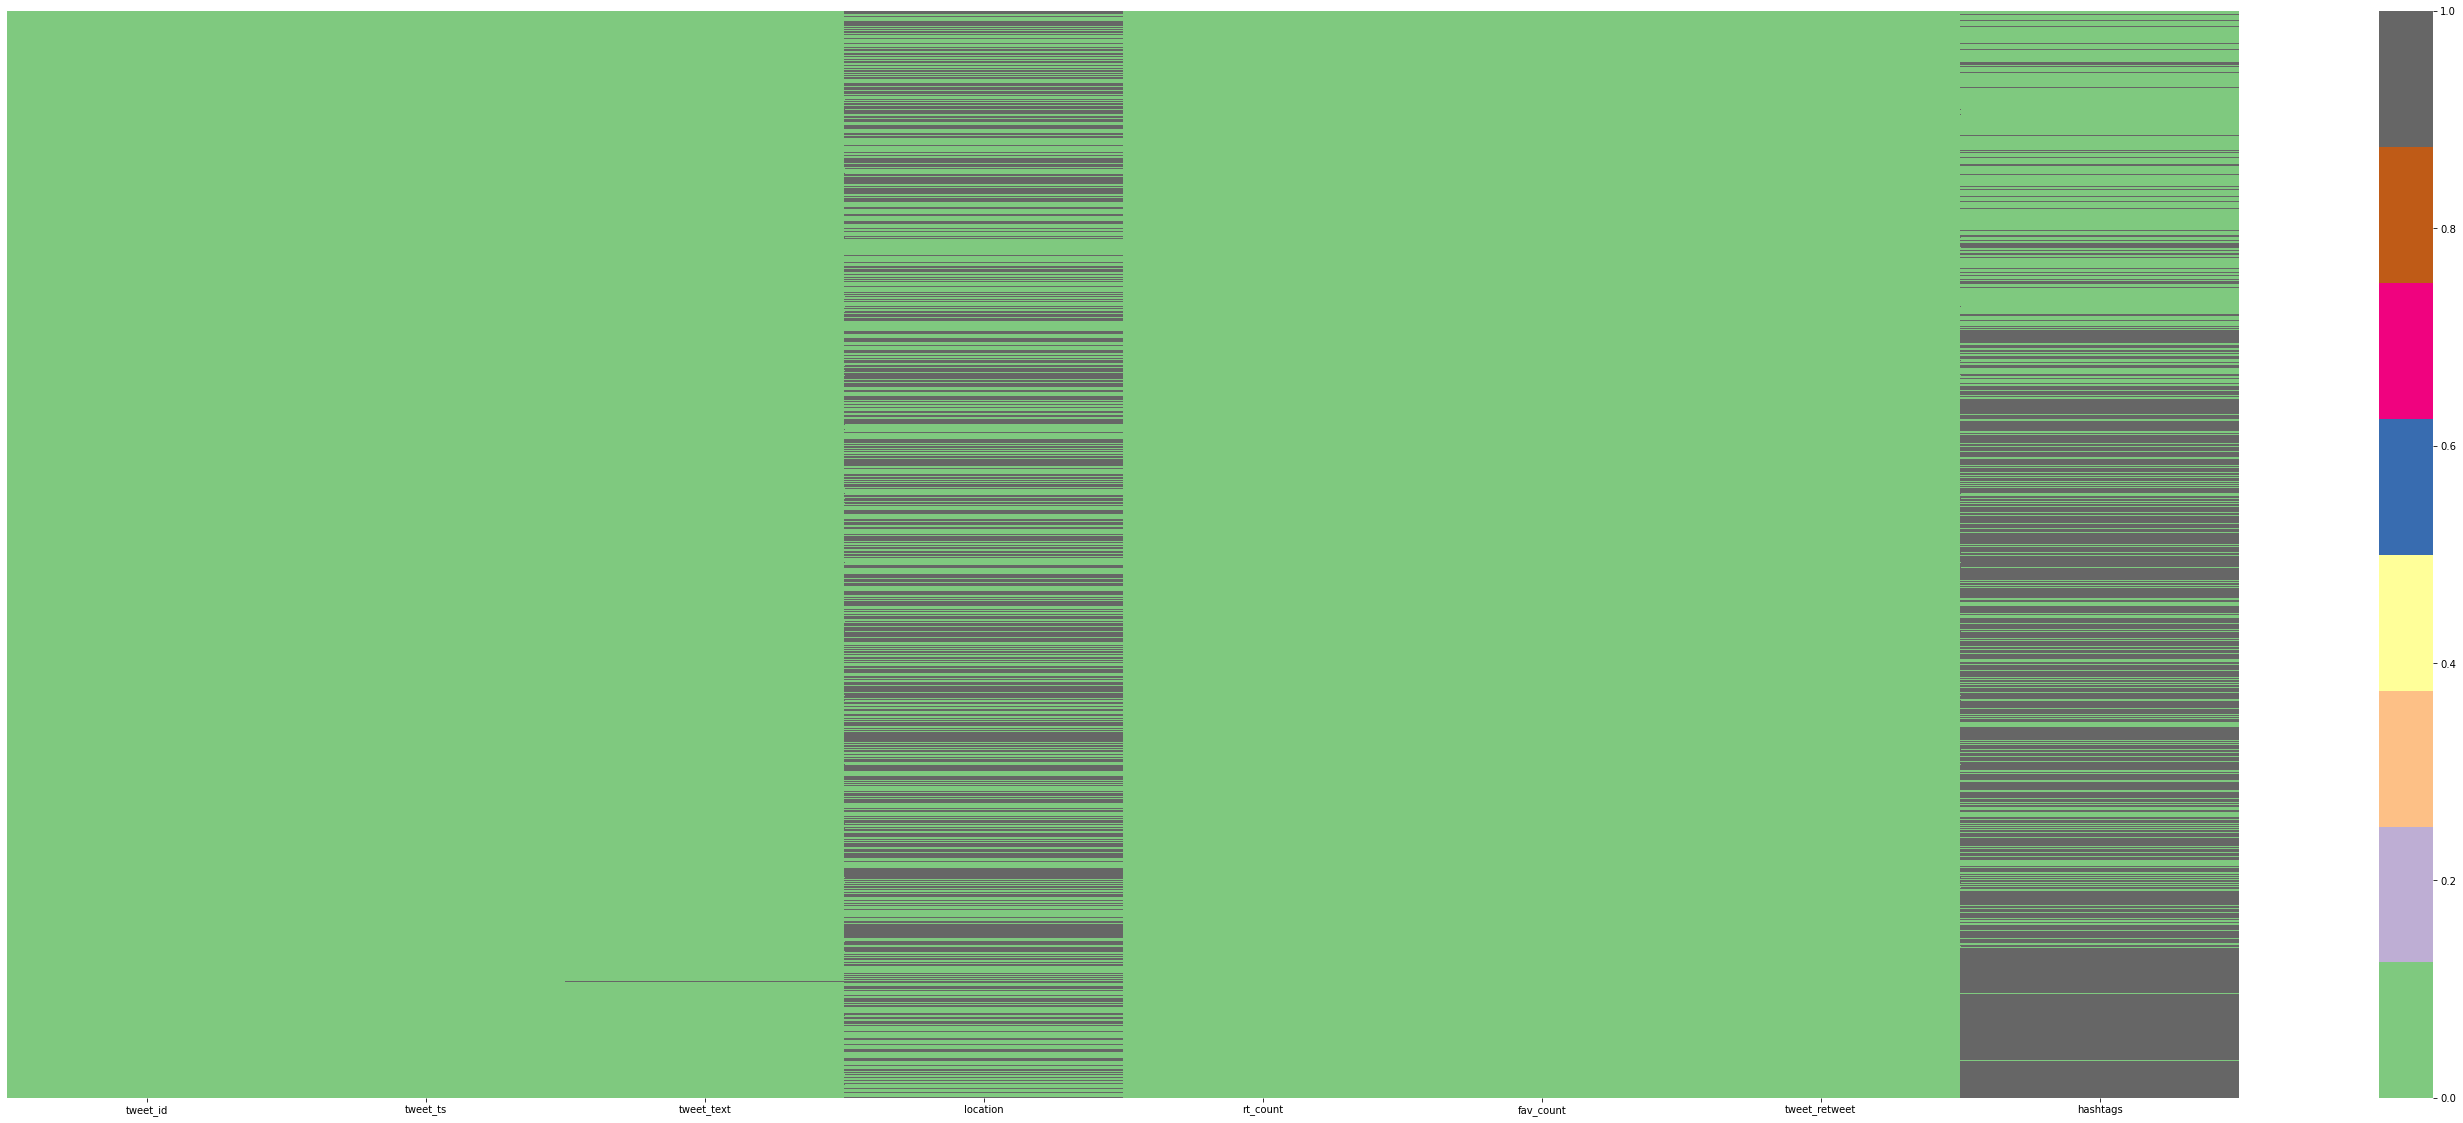

In [362]:
plt.figure(figsize=(50,20))
sns.heatmap(df.isnull(), yticklabels=False, cmap= 'Accent')
plt.show()

In [363]:
df.loc[:'location']=df.fillna("None")
df.loc[:'retweets']=df.fillna("None")
df

,tweet_id,tweet_ts,tweet_text,location,rt_count,fav_count,tweet_retweet,hashtags
0,1357386903159361538,2021-02-04 17:53:51,Muder of ð,None,172,0,RT,#TooMuchDemocracy
1,1357386894493896705,2021-02-04 17:53:49,Star War breaks out in India.All thanks to sup...,"Scarborough, England",48,0,RT,"#ModiGlobalDisaster, #TooMuchDemocracy"
2,1357386887648935942,2021-02-04 17:53:47,Whaat? We haven't disabled Rihanna's twitter h...,None,914,0,RT,#TooMuchDemocracy
3,1357386875560808448,2021-02-04 17:53:44,RJD MP Prof Manoj Jha lambasted Modi in the ru...,"Ahmadabad City, India",563,0,RT,"#FarmersProstest, #Toâ¦"
4,1357386864597041153,2021-02-04 17:53:42,"Too much shame brought to India by RW ,BJP, bh...",None,3,0,RT,#TooMuchDemocracy
...,...,...,...,...,...,...,...,...
17611,1355038916869406722,2021-01-29 06:23:47,Interesting speed at which the so called secul...,None,271,0,TWEET,None
17612,1355024298944065536,2021-01-29 05:25:42,Finish EGO ðð»Not FARMERS ð¾,None,1,6,TWEET,None
17613,1355017431735930881,2021-01-29 04:58:25,Art has and will always be for everyone. It ha...,India,107,0,TWEET,None
17614,1355017298789208064,2021-01-29 04:57:53,Watch. The Power of Words#TooMuchDemocracyby....,None,0,5,TWEET,#TooMuchDemocracyby.


In [364]:
#df = df['hashtags'].fillna('none')

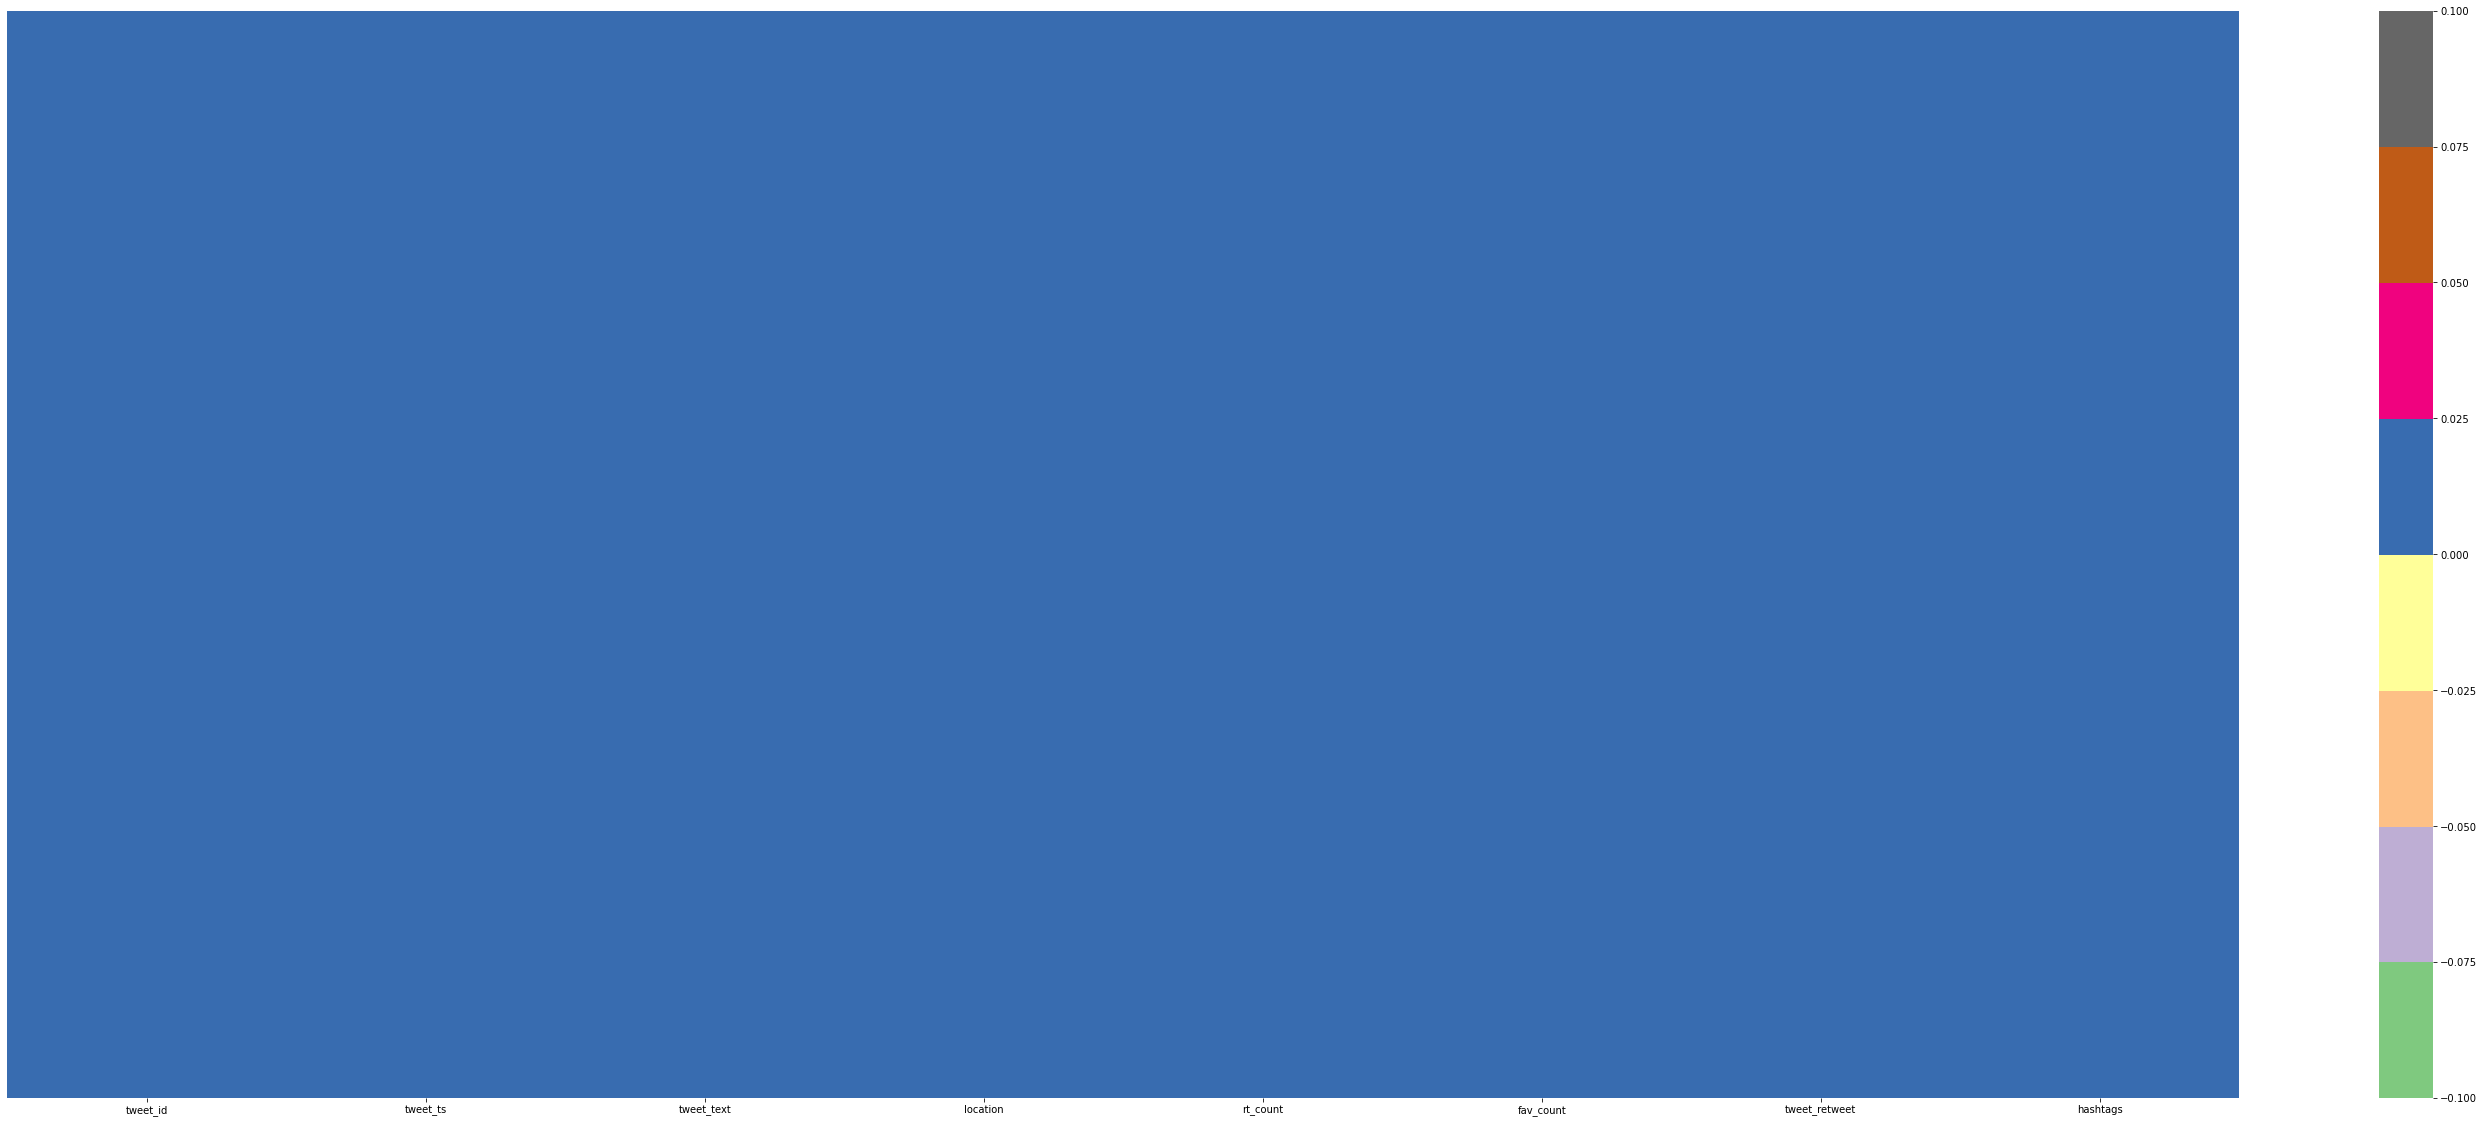

In [365]:
plt.figure(figsize=(50,20))
sns.heatmap(df.isnull(), yticklabels=False, cmap= 'Accent')
plt.show()

In [384]:
df.tweet_text[24]
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.tweet_text[24], 'lxml')
print(example1.get_text())

RJD MP Prof Manoj Jha lambasted Modi in the running session!Sacked modi governmentWatch and listen


In [385]:
df.tweet_text[24]
from bs4 import BeautifulSoup
example1 = BeautifulSoup(df.tweet_text[24], 'lxml')
print(example1.get_text())

RJD MP Prof Manoj Jha lambasted Modi in the running session!Sacked modi governmentWatch and listen


In [386]:
re.sub(r'@[A-Za-z0-9]+','',df.tweet_text[279])

'Current situation of cricketer and actors( Dogs of ambani )  '

In [387]:
df.shape

(17616, 8)

In [390]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = df.tweet_text[:100]
test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

nums = [0,17600]
#print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    #print("Tweets %d of %d has been processed" % ( i+1, nums[1] ) )  
    clean_tweet_texts.append(tweet_cleaner(df['tweet_text'][i]))
    

#For the rest, you get the idea, I divided the whole dataset into four batches.Saving cleaned data as csv
clean_df = pd.DataFrame(clean_tweet_texts,columns=['text'])
clean_df.head()

clean_df.to_csv('clean_tweet.csv',encoding='utf-8')
csv = 'clean_tweet.csv'
new_df = pd.read_csv(csv,index_col=0)
new_df.to_csv('Final.csv', mode='w', index=False, encoding="utf-8")
final_df = pd.read_csv('Final.csv')
print('The Parsing is complete')

The Parsing is complete


In [391]:
#Test whether the text has been parsed or not 
final_df.text[2]

'whaat we haven t disabled rihanna s twitter handle yet'

In [392]:
COLS = ['sentiment','subjectivity','polarity']

In [393]:
polarity = []
for tweet in clean_tweets:
    #print(tweet)
    analysis = TextBlob(tweet)
    #print(tweet ,analysis.sentiment)
    polarity.append(analysis.sentiment.polarity)
final_df['polarity'] = pd.DataFrame(polarity)

In [394]:
final_df.head()

,text,polarity
0,muder of,0.0
1,star war breaks out in india all thanks to sup...,0.2
2,whaat we haven t disabled rihanna s twitter ha...,-0.2
3,rjd mp prof manoj jha lambasted modi in the ru...,0.0
4,too much shame brought to india by rw bjp bhak...,0.2


In [395]:
sentiment = []
for tweet in clean_tweets:
    #print(tweet)
    analysis = TextBlob(tweet)
    #print (analysis.sentiment)
    
    if analysis.sentiment.polarity > 0: 
        sentiment.append('positive')
    elif analysis.sentiment.polarity == 0: 
        sentiment.append('neutral')
    else: 
        sentiment.append('negative')
final_df['sentiment'] = pd.DataFrame(sentiment)

In [396]:
final_df.head()

,text,polarity,sentiment
0,muder of,0.0,neutral
1,star war breaks out in india all thanks to sup...,0.2,positive
2,whaat we haven t disabled rihanna s twitter ha...,-0.2,negative
3,rjd mp prof manoj jha lambasted modi in the ru...,0.0,neutral
4,too much shame brought to india by rw bjp bhak...,0.2,positive


In [397]:
label = ['positive','negative','neutral']
final_df['sentiment'].value_counts()


neutral     2026
positive     745
negative     744
Name: sentiment, dtype: int64

Text(0, 0.5, 'Mood')

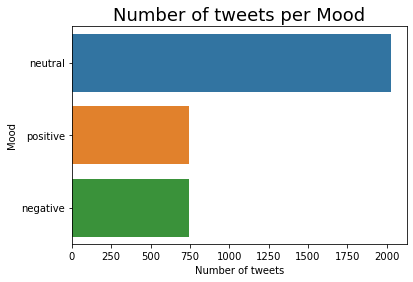

In [398]:
sns.countplot(y='sentiment', data=final_df)
plt.title('Number of tweets per Mood', fontsize=18)
plt.xlabel('Number of tweets')
plt.ylabel('Mood')

# Wordclouds 

## Negative

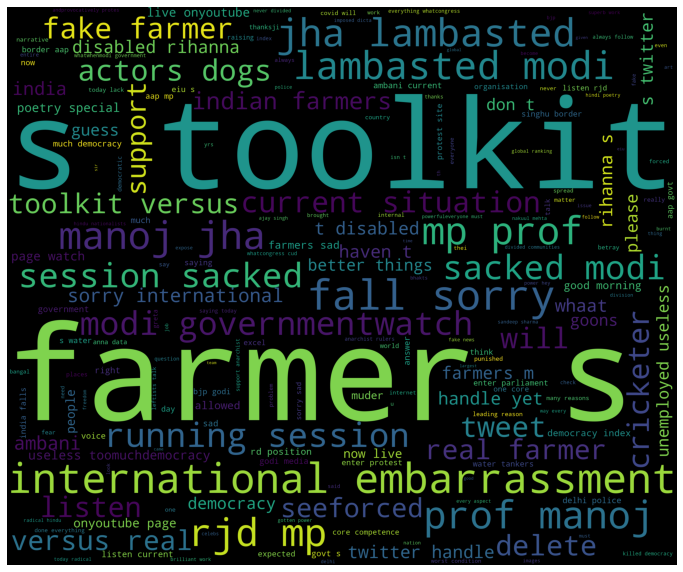

In [235]:
df_negative = final_df[final_df['sentiment']=='negative']
words = ' '.join(df_negative['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Positive

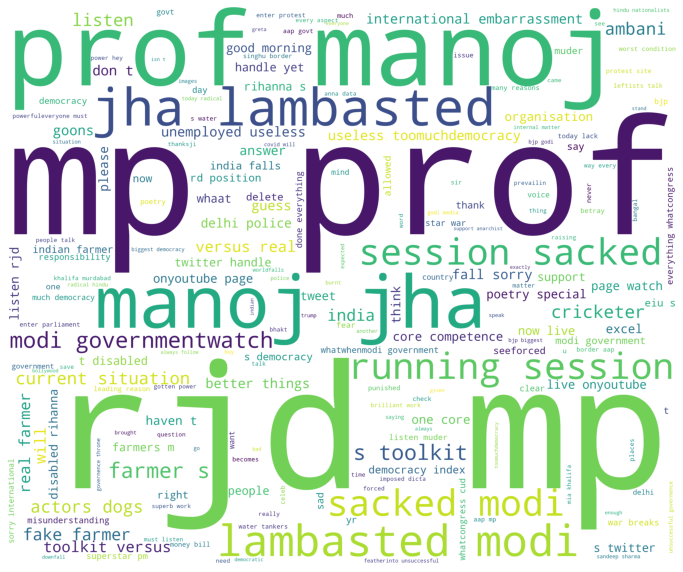

In [400]:
df_postive = final_df [final_df['sentiment']=='positive']
words = ' '.join(df_postive['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Hashtags

In [370]:
def hashtag_extract(x):
    h = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        h.append(ht)
    return h

In [371]:
h = hashtag_extract(df.hashtags)

In [401]:
l = h
output = [] 
def reemovNestings(l): 
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            output.append(i) 
reemovNestings(l) 

In [404]:
hashtags = pd.DataFrame({'hashtag':output})

In [405]:
hashtags

,hashtag
0,TooMuchDemocracy
1,ModiGlobalDisaster
2,TooMuchDemocracy
3,TooMuchDemocracy
4,FarmersProstest
...,...
12993,TooMuchDemocracy
12994,RavishKumar
12995,toomuchdemocracy
12996,toomuchdemocracy


In [406]:
hashtags.hashtag.value_counts().head(20)

TooMuchDemocracy              4814
FarmersProstest               1981
Toâ                           1861
SpinelessCelebs                330
FarmersProtest                 290
ToolKitExposed                 269
IStandWithFarmers              260
StandWithFarmers               227
ModiGlobalDisaster             223
FarmersAreIndiað               199
FarmersAreIndiahâ              188
FarmersAreIndia                176
IndianFarmersHumanRights       128
WorldSupportsIndianFarmers     111
GretaThunberg                   90
ConspiracyAgainstIndia          76
FarmerProtest                   63
TooMuchDeâ                      61
GretaGoToSchool                 58
TooMuchDemocracâ                58
Name: hashtag, dtype: int64

In [409]:
brands = pd.DataFrame(hashtags.hashtag.value_counts().head(15).reset_index())
brands.columns = ['tweets', 'count']
brands

,tweets,count
0,TooMuchDemocracy,4814
1,FarmersProstest,1981
2,Toâ,1861
3,SpinelessCelebs,330
4,FarmersProtest,290
5,ToolKitExposed,269
6,IStandWithFarmers,260
7,StandWithFarmers,227
8,ModiGlobalDisaster,223
9,FarmersAreIndiað,199


In [410]:
brands = brands.drop(brands.index[2],axis = 0)

In [411]:
brands

,tweets,count
0,TooMuchDemocracy,4814
1,FarmersProstest,1981
3,SpinelessCelebs,330
4,FarmersProtest,290
5,ToolKitExposed,269
6,IStandWithFarmers,260
7,StandWithFarmers,227
8,ModiGlobalDisaster,223
9,FarmersAreIndiað,199
10,FarmersAreIndiahâ,188


In [412]:
labels = brands.tweets
sizes = brands['count']

## Plotting Hashtags 

Text(0.5, 1.0, 'Hashtags used')

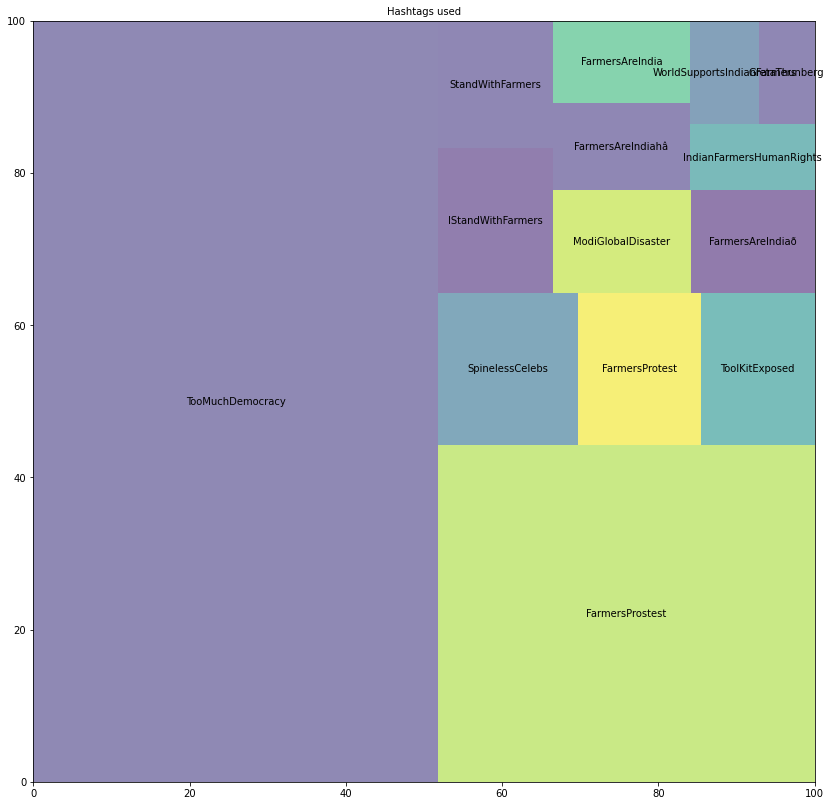

In [416]:
import squarify
plt.subplots(figsize=(14,14))
#plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
squarify.plot(sizes=sizes, label=labels, alpha=0.6)
plt.title('Hashtags used', fontsize=10)